# 4.1 - Data Cleaning 2


![cleaning2](images/data_cleaning_cycle.avif)

# Ejemplo 1 - Airbnb data


En esta limpieza nos centraremos en tres conceptos:

+ Valores nulos.
+ Datos inconsistentes 
+ Valores atípicos (Outliers)

Primero importamos librerias y los datos.

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
# se cargan los datos

df_ori = pd.read_csv('../data/AB_NYC_2019.csv')

df = df_ori.copy()

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**EDA**

Se comienza la exploracion de los datos.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Columnas numericas**

In [6]:
num_df = df.select_dtypes(exclude='object')

num_df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**Columnas categoricas**

In [7]:
cat_df = df.select_dtypes(include='object')

cat_df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

## Valores Nulos

In [8]:
nan_cols = df.isna().sum() # serie con los indices y valores nulos en cada uno

nan_cols[nan_cols>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [9]:
nan_cols = df.isna().mean()*100

nan_cols[nan_cols>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

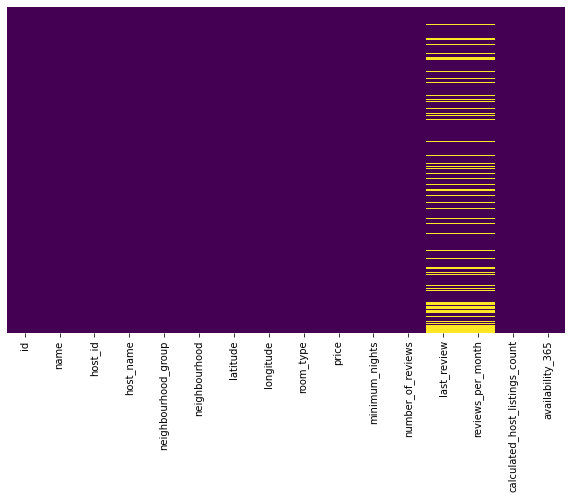

In [10]:
# grafica de nulos en el dataframe

plt.figure(figsize=(10,6))

sns.heatmap(df.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [18]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols  = df.isna().mean()*100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10,6))

    sns.heatmap(df.isna(),
               yticklabels=False,
               cmap='viridis',
               cbar = False)

    plt.show();
    

'N nan cols: 4'

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

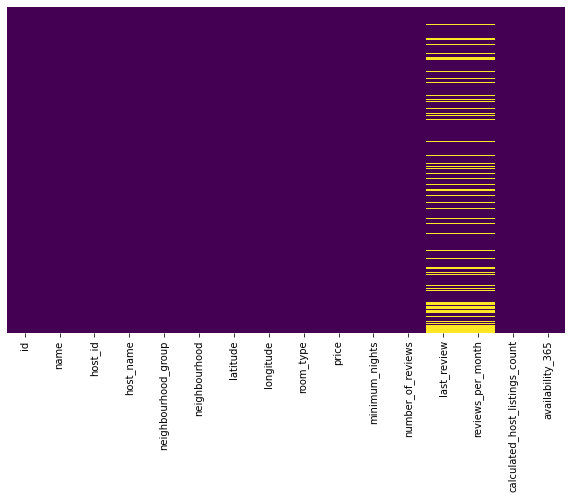

In [19]:
check_nan(df)

**¿Qué hacemos con estos valores?**

In [20]:
cols = ['id', 'host_id', 'host_name']

df.drop(cols, axis=1, inplace=True)

In [21]:
df.price.isna().sum()

0

In [22]:
# vamos a trabajar sobre esta columna para ver diferentes ejemplos ya que no se verá afectada

# borra la fila entera si hay nulo en esa columna
df.price.dropna(inplace=True)

In [23]:
# borrar filas si tienen nulos en ciertas columnas

df.dropna(inplace=True, subset=['price', 'latitude', 'longitude'])

In [24]:
# podemos rellenar los valores nulos, por ejemplo con la media

df.price.fillna(df.price.mean(), inplace=True)

In [25]:
# o con la mediana
df.price.fillna(df.price.median(), inplace=True)

In [26]:
#backward/forward fill

df.price.bfill() # valor anterior
df.price.ffill().head() # valor posterior

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [27]:
# rellenar varias columnas

df.fillna({'reviews_per_month': 0, 'name': 'unknown'}, inplace=True)

'N nan cols: 1'

last_review    20.558339
dtype: float64

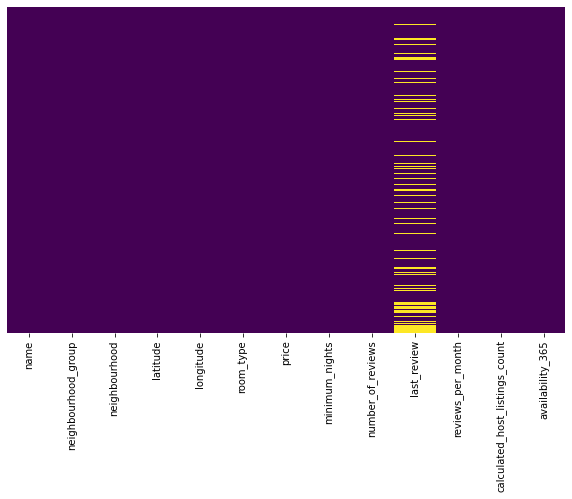

In [28]:
check_nan(df)

**para categorias, una estragia puede ser rellenar con el valor mas frecuente**

In [30]:
lst = ['unknown', 'None', 0]

In [33]:
nan_cols = df.isna().sum()*100

In [34]:
dictio = dict(zip(nan_cols[nan_cols>0].index, lst))

In [35]:
dictio

{'last_review': 'unknown'}

'N nan cols: 1'

last_review    20.558339
dtype: float64

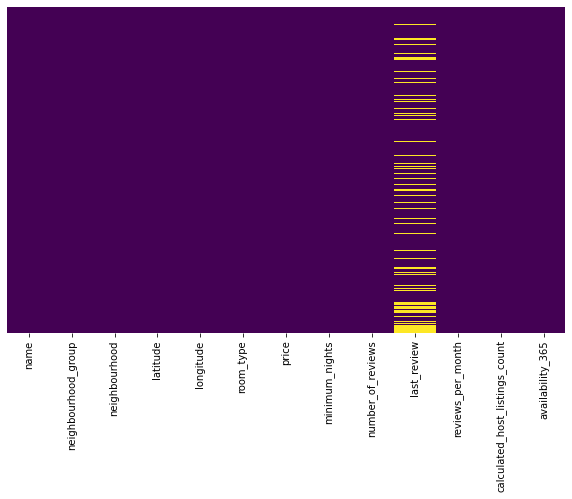

In [29]:
check_nan(df)

In [36]:
df.last_review.fillna('unknown', inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

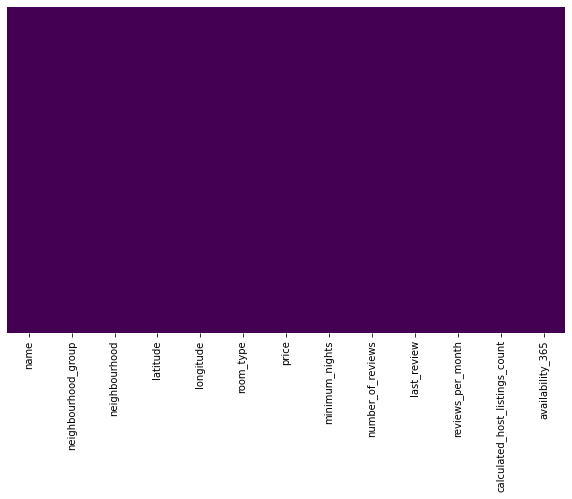

In [37]:
check_nan(df)

## Datos inconsistentes 


**Fechas**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     48895 non-null  object 
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [39]:
df.last_review.unique()

array(['2018-10-19', '2019-05-21', 'unknown', ..., '2017-12-23',
       '2018-01-29', '2018-03-29'], dtype=object)

In [40]:
df.last_review.replace('unknown', None, inplace=True)

In [41]:
df.last_review = pd.to_datetime(df.last_review, format='%Y-%m-%d')

In [42]:
df.last_review.unique()

array(['2018-10-19T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
                                 'NaT', ...,
       '2017-12-23T00:00:00.000000000', '2018-01-29T00:00:00.000000000',
       '2018-03-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [43]:
df.last_review.ffill(inplace=True)

In [44]:
df.last_review.head(15)

0    2018-10-19
1    2019-05-21
2    2019-05-21
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
10   2019-06-22
11   2019-06-23
12   2019-06-24
13   2019-07-05
14   2018-10-31
Name: last_review, dtype: datetime64[ns]

'N nan cols: 0'

Series([], dtype: float64)

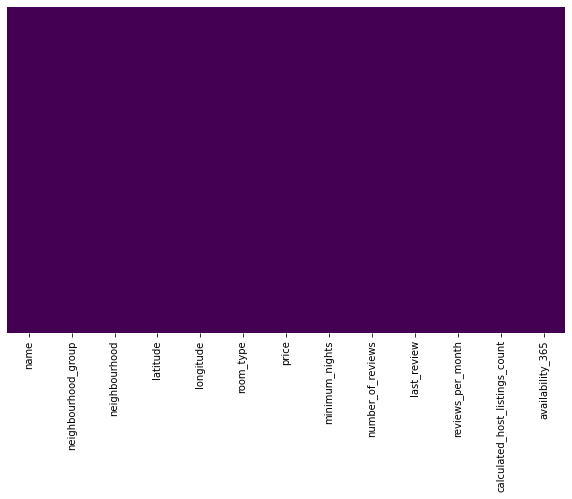

In [45]:
check_nan(df)

**Arreglando errores en strings**

In [46]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [70]:
# introduzco un error en los datos
mal_index = df.sample(2, random_state=42).index

mal_escrito = ['Manhhhatanta', 'brookkli']
df.loc[mal_index, 'neighbourhood_group'] = mal_escrito

In [71]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20103
Queens            5665
Bronx             1091
Staten Island      373
Manhhhatanta         1
brookkli             1
Name: neighbourhood_group, dtype: int64

In [72]:
df.neighbourhood_group.replace(['Manhhhatanta', 'brookkli'],
                              ['Manhattan', 'Brooklyn'],
                              inplace = True)

In [73]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**ejemplo:** Busqueda de filas que contengan una palabra clave

In [74]:
# usando regex
key_word = '[Nn]oisy'

find = df[df.name.str.contains(key_word, regex=True)]

find

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19733,Noisy room next to Prospect Park,Brooklyn,Prospect-Lefferts Gardens,40.65762,-73.96129,Private room,500,1,0,2018-10-21,0.00,1,89
23857,Small Homey Studio in a Big Noisy City,Manhattan,Harlem,40.81703,-73.93691,Entire home/apt,84,2,3,2017-06-28,0.12,1,0
35343,My wife is not used to the noisy environment. How,Manhattan,Financial District,40.70535,-74.01277,Entire home/apt,200,1,0,2019-06-17,0.00,1,0


In [77]:
keys = ['Noisy', 'noisy']

find_2 = df[df.name.str.contains(keys[0])]

find_2

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19733,Noisy room next to Prospect Park,Brooklyn,Prospect-Lefferts Gardens,40.65762,-73.96129,Private room,500,1,0,2018-10-21,0.00,1,89
23857,Small Homey Studio in a Big Noisy City,Manhattan,Harlem,40.81703,-73.93691,Entire home/apt,84,2,3,2017-06-28,0.12,1,0


In [78]:
df.shape

(48895, 13)

In [80]:
# comprobar duplicados
df.duplicated().any() # hay algún registro duplicado, si es True --> df.drop_duplicates() y a correr


False

**Cambio del tipo de dato, optimizacion de memoria**

In [81]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

In [82]:
for c in df:
    print(c)

name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [83]:
for c in df.select_dtypes('object').columns:
    df[c]=df[c].astype('category')

In [84]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  category      
 1   neighbourhood_group             48895 non-null  category      
 2   neighbourhood                   48895 non-null  category      
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  category      
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

In [85]:
for c in df.select_dtypes('integer').columns:
    df[c] = pd.to_numeric(df[c], downcast='integer')

In [86]:
for c in df.select_dtypes('float').columns:
    df[c] = pd.to_numeric(df[c], downcast='float')

In [87]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  category      
 1   neighbourhood_group             48895 non-null  category      
 2   neighbourhood                   48895 non-null  category      
 3   latitude                        48895 non-null  float32       
 4   longitude                       48895 non-null  float32       
 5   room_type                       48895 non-null  category      
 6   price                           48895 non-null  int16         
 7   minimum_nights                  48895 non-null  int16         
 8   number_of_reviews               48895 non-null  int16         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float32       
 11  ca

## Outliers

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728951,0.054530,40.499790,40.690102,40.723068,40.763115,40.913059
longitude,48895.0,-73.952171,0.046157,-74.244423,-73.983070,-73.955681,-73.936275,-73.712990
price,48895.0,152.720687,240.154170,0.000000,69.000000,106.000000,175.000000,10000.000000
minimum_nights,48895.0,7.029962,20.510550,1.000000,1.000000,3.000000,5.000000,1250.000000
number_of_reviews,48895.0,23.274466,44.550582,0.000000,1.000000,5.000000,24.000000,629.000000
reviews_per_month,48895.0,1.090910,1.597283,0.000000,0.040000,0.370000,1.580000,58.500000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.000000,1.000000,1.000000,2.000000,327.000000
availability_365,48895.0,112.781327,131.622289,0.000000,0.000000,45.000000,227.000000,365.000000


In [89]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [90]:
df[df.price == max(df.price)]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Queens,Astoria,40.768101,-73.916512,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.732601,-73.957390,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,1-BR Lincoln Center,Manhattan,Upper West Side,40.772129,-73.986649,Entire home/apt,10000,30,0,2019-06-01,0.00,1,83


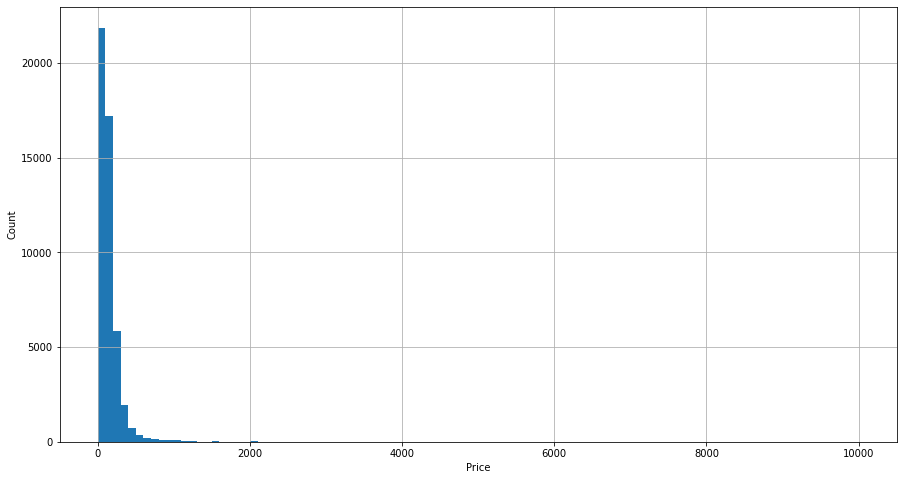

In [92]:
plt.figure(figsize=(15,8))

df.price.hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Count');

<AxesSubplot:>

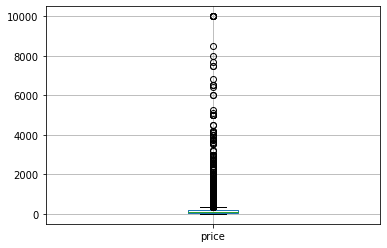

In [93]:
df.boxplot(column=['price'])

In [94]:
df[df.price==min(df.price)]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,40.690231,-73.954277,Private room,0,4,1,2018-01-06,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,40.832958,-73.886681,Private room,0,2,55,2019-06-24,2.56,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,40.694672,-73.924332,Private room,0,2,16,2019-05-18,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,40.724621,-73.940720,Private room,0,2,12,2017-10-27,0.53,2,0
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,40.708382,-73.946449,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,40.681728,-73.913422,Private room,0,1,93,2019-06-15,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,40.682789,-73.911697,Private room,0,1,95,2019-06-21,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,40.682579,-73.912842,Private room,0,1,95,2019-06-23,4.35,6,222
26259,the best you can find,Manhattan,Murray Hill,40.750912,-73.975967,Entire home/apt,0,3,0,2019-06-23,0.00,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,40.692108,-73.906700,Shared room,0,30,2,2019-06-22,0.11,6,333


In [95]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0, 0.5, 'Count')

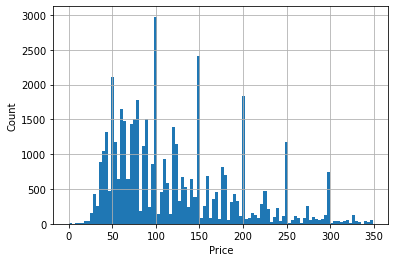

In [96]:
data = df[df.price< 350].price

data.hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Count')

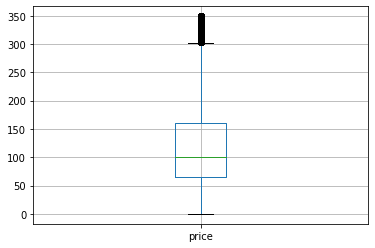

In [97]:
df[df.price<350].boxplot(column=['price']);

**depende del contexto**

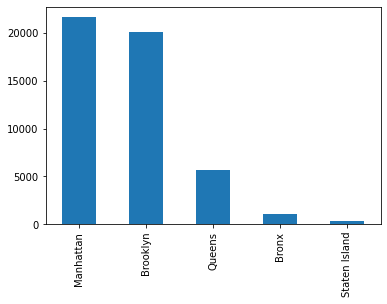

In [98]:
df.neighbourhood_group.value_counts().plot.bar();

In [100]:
stats = df.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats['IQR1.5'] = 1.5 * stats['IQR']+stats['75%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
latitude,48895.0,40.728951,0.054530,40.499790,40.690102,40.723068,40.763115,40.913059,0.073013,40.872635
longitude,48895.0,-73.952171,0.046157,-74.244423,-73.983070,-73.955681,-73.936275,-73.712990,0.046795,-73.866083
price,48895.0,152.720687,240.154170,0.000000,69.000000,106.000000,175.000000,10000.000000,106.000000,334.000000
minimum_nights,48895.0,7.029962,20.510550,1.000000,1.000000,3.000000,5.000000,1250.000000,4.000000,11.000000
number_of_reviews,48895.0,23.274466,44.550582,0.000000,1.000000,5.000000,24.000000,629.000000,23.000000,58.500000
reviews_per_month,48895.0,1.090910,1.597283,0.000000,0.040000,0.370000,1.580000,58.500000,1.540000,3.890000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.000000,1.000000,1.000000,2.000000,327.000000,1.000000,3.500000
availability_365,48895.0,112.781327,131.622289,0.000000,0.000000,45.000000,227.000000,365.000000,227.000000,567.500000


In [101]:
df['price_per_night'] = df.price / df.minimum_nights

df

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.647491,-73.972366,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000
1,Skylit Midtown Castle,Manhattan,Midtown,40.753620,-73.983772,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.809021,-73.941902,Private room,150,3,0,2019-05-21,0.00,1,365,50.000000
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.685139,-73.959763,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.798512,-73.943993,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.678532,-73.949951,Private room,70,2,0,2019-07-08,0.00,2,9,35.000000
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.701839,-73.933167,Private room,40,4,0,2019-07-08,0.00,2,36,10.000000
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.814751,-73.948669,Entire home/apt,115,10,0,2019-07-08,0.00,1,27,11.500000
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.757511,-73.991119,Shared room,55,1,0,2019-07-08,0.00,6,2,55.000000


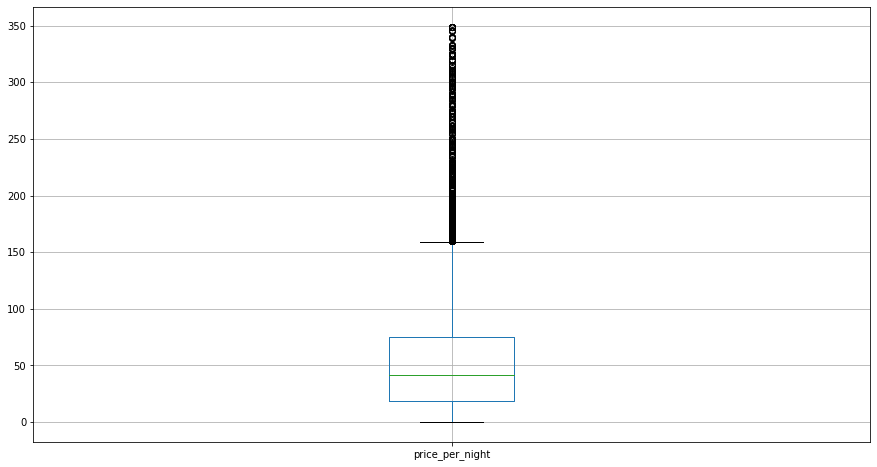

In [104]:
plt.figure(figsize=(15,8))
df[df.price<350].boxplot(column=['price_per_night']);

In [122]:
df.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

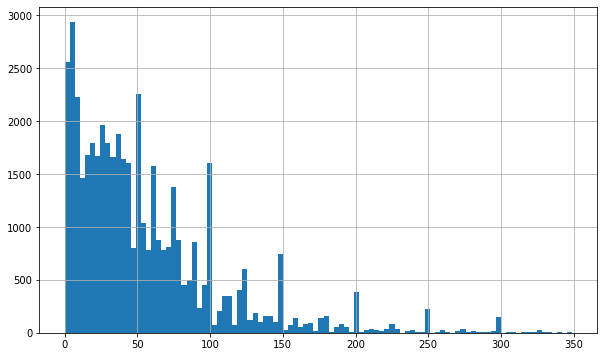

In [118]:
plt.figure(figsize=(10, 6))

df[df.price< 350].price_per_night.hist(bins=100);

Text(0, 0.5, 'Count')

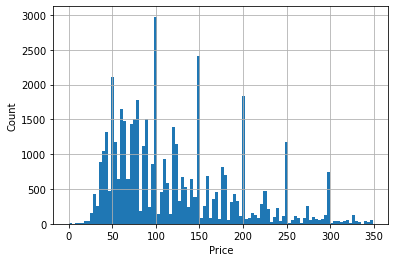

In [110]:
data = df[df.price< 350].price

data.hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Count')

In [107]:
df.shape

(48895, 14)

In [108]:
df_ori.shape

(48895, 16)

# Ejemplo 2 - House Data


**Cargamos los datos**

In [123]:
df_ori = pd.read_csv('../data/sberbank.csv')

df = df_ori.copy()

df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

**EDA**

In [124]:
df.shape

(30471, 292)

In [125]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 92.6 MB


In [127]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,30471.0,15237.917397,8796.501536,1.0,7620.5,15238.0,22855.5,30473.0
full_sq,30471.0,54.214269,38.031487,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,34.403271,52.285733,0.0,20.0,30.0,43.0,7478.0
floor,30304.0,7.670803,5.319989,0.0,3.0,6.5,11.0,77.0
max_floor,20899.0,12.558974,6.756550,0.0,9.0,12.0,17.0,117.0


**Columnas numericas**

In [128]:
num_df = df.select_dtypes(include=[np.number])

num_df.columns.values

array(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school',
       'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'full_all', 'male_f', 'female_f', 'young_all',
       'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female',
       '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male',
       '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
       '16_29_male', '16_29_female', '0_13_a

**Columnas categoricas**

In [129]:
cat_df = df.select_dtypes(exclude=[np.number])

cat_df.columns.values

array(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
       'big_road1_1line', 'railroad_1line', 'ecology'], dtype=object)

## Valores Nulos

'N nan cols: 51'

life_sq                                  20.947786
floor                                     0.548062
max_floor                                31.413475
material                                 31.413475
build_year                               44.649011
num_room                                 31.413475
kitch_sq                                 31.413475
state                                    44.498047
preschool_quota                          21.948738
school_quota                             21.938893
hospital_beds_raion                      47.392603
raion_build_count_with_material_info     16.379508
build_count_block                        16.379508
build_count_wood                         16.379508
build_count_frame                        16.379508
build_count_brick                        16.379508
build_count_monolith                     16.379508
build_count_panel                        16.379508
build_count_foam                         16.379508
build_count_slag               

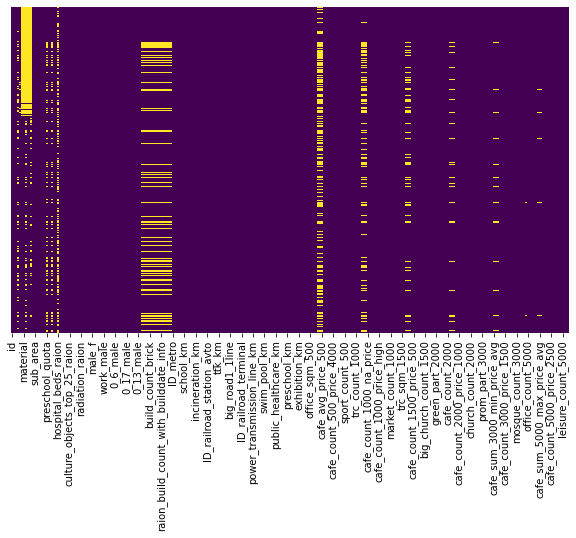

In [130]:
check_nan(df)

In [131]:
nan_cols = df.isna().mean()*100

In [132]:
# vamos a poner un umbral para eliminar columnas con un numero de nulos, en este caso 30%

df_less_30 = df.drop(nan_cols[nan_cols>30].index, axis=1)

df_less_30.shape

(30471, 282)

In [134]:
# vamos a crear un indicardor de nulos por fila

num_nan = []

for fila in df.itertuples():
    
    check = []
    
    for registro in fila:
        check.append(pd.isna(registro))
        
    num_nan.append(sum(check))

num_nan[:20]

[9, 6, 6, 7, 6, 7, 6, 6, 6, 6, 7, 12, 6, 6, 6, 7, 10, 7, 7, 6]

In [135]:
df_less_30['num_nan'] = [sum([pd.isna(registro) for registro in fila]) for fila in df.itertuples()]

In [137]:
df_less_30[df_less_30.num_nan>30].shape # aproximadamente el 10% de nuestro registros tienen 30 nulos por fila

(2206, 283)

In [140]:
df_less_30.drop(df_less_30[df_less_30.num_nan >30].index, axis=0, inplace=True)

'N nan cols: 41'

life_sq                                  18.117814
floor                                     0.474085
preschool_quota                          15.857067
school_quota                             15.846453
raion_build_count_with_material_info      9.853175
build_count_block                         9.853175
build_count_wood                          9.853175
build_count_frame                         9.853175
build_count_brick                         9.853175
build_count_monolith                      9.853175
build_count_panel                         9.853175
build_count_foam                          9.853175
build_count_slag                          9.853175
build_count_mix                           9.853175
raion_build_count_with_builddate_info     9.853175
build_count_before_1920                   9.853175
build_count_1921-1945                     9.853175
build_count_1946-1970                     9.853175
build_count_1971-1995                     9.853175
build_count_after_1995         

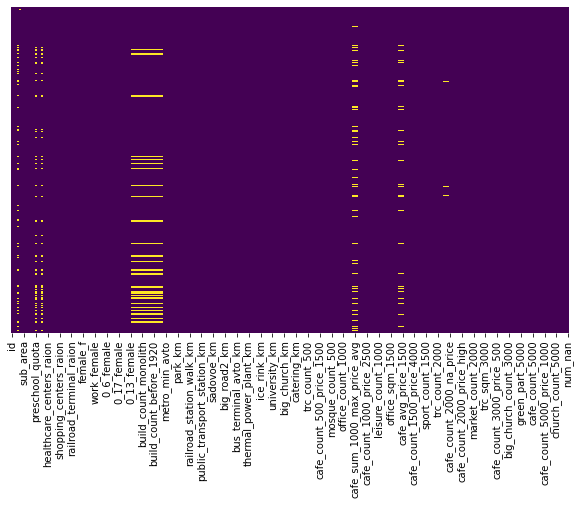

In [141]:
check_nan(df_less_30)

In [143]:
nan_cols = df_less_30.isna().mean()*100

cat_nan_df = df_less_30[nan_cols[nan_cols>0].index].select_dtypes(include='object')

cat_nan_df.columns

Index([], dtype='object')

In [145]:
df_less_30.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,28265.0,1.545736e+04,8.755764e+03,1.000,8182.000,15637.000,22977.0,30473.0
full_sq,28265.0,5.415333e+01,3.917691e+01,0.000,38.000,49.000,63.0,5326.0
life_sq,23144.0,3.414198e+01,5.316486e+01,0.000,20.000,30.000,43.0,7478.0
floor,28131.0,7.743521e+00,5.346223e+00,0.000,3.000,7.000,11.0,77.0
area_m,28265.0,1.498432e+07,1.651163e+07,2081627.761,6879019.638,9780189.547,15045565.2,176246410.0


In [146]:
df_less_30.fillna(df_less_30.median(), inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

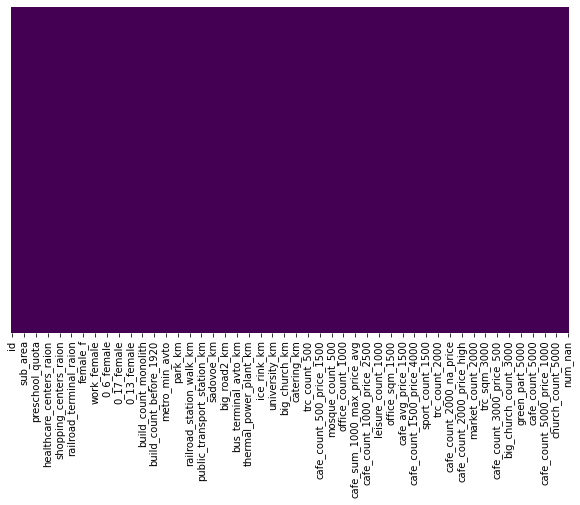

In [147]:
check_nan(df_less_30)

In [148]:
df_less_30.shape

(28265, 283)

In [149]:
df_ori.shape

(30471, 292)